In [1]:
project_dir = '/Users/prajayshah/OneDrive/PycharmProjects/NeuronalModelling'

import os
import sys;

import pandas as pd
sys.path.append(project_dir)
sys.path.append('/Users/prajayshah/OneDrive/PycharmProjects/funcsforprajay/src/')
import numpy as np
import scipy.integrate
from functools import partial
import matplotlib.pyplot as plt
from funcsforprajay import funcs
import pickle
from firing_rate_machine.utils import *



plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points


/Users/prajayshah/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


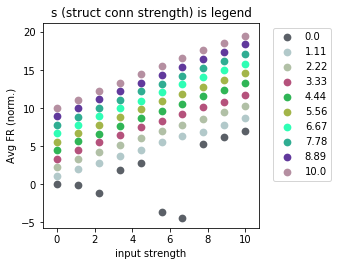

In [4]:
# %% multi simulations

pkl_path_dir = f"{project_dir}/sim-exports"
os.makedirs(pkl_path_dir, exist_ok=True) if not os.path.exists(pkl_path_dir) else None
pkl_path_full =  f"{pkl_path_dir}/lowrank_input vs s strength, positive input.pkl"

size1 = size2 = 10
x_range = np.linspace(0, 10, size1)
y_range = np.linspace(0, 10, size2)
# y_range = [1]
size1=len(x_range)
size2=len(y_range)
result = np.empty([size1, size2])  # collect corr coefficients

# Network
N = 1000  # Number of units
Mm = 1.1  # Mean of m
Mn = 2.  # Mean of n
Sim = 1.  # Std of m
Sin = 1.  # Std of n

# connectivity matrix base
R = 1 * GetBulk(N)  # random matrix
m = GetGaussianVector(Mm, Sim, N)
n = GetGaussianVector(Mn, Sin, N)
M = np.outer(m, n) / N  # structured matrix


# initial values
t0 = GetGaussianVector(0, 0, N)




run = 0  # flag for running simulation loop
if run:
    print('\n ** Simulating... **')
    count = 0
    for i, x in enumerate(x_range):
        for j, y in enumerate(y_range):
            count += 1

            if count % 5 == 0: save = True
            else: save = False

            g = 1           # Random strength
            s = y           # structure strength
            h = s / ((np.dot(m, n)) / N)

            # Input
            mean_i = x
            I = GetGaussianVector(mean_i, 1, N)
            # I = 0

            # Simulation

            T = 40         # Total time of integration, expressed in time constants of single units
            deltat = 0.1
            t = np.linspace( 0, T, int(T/deltat) )

            # Build connectivity matrix
            J = g * R + h * M  # final connectivity matrix of the simulation

            ### Simulate
            # initial values
            # t0 = GetGaussianVector(0, 1, N)
            # r_init = np.array([[1]*N]) # vector of firing rates of Nn neurons, initialized at 0 for all neurons
            # t0 = r_init[0]*2

            t_max = 500  # simulation length
            t_stim = 0  # stimulus length (relative to total simulation length)
            time_steps = int(t_max / 10) # resolution


            t = np.linspace(0, t_max, t_max*time_steps)

            ## Simulate
            F = SimulateActivity(t=t, x0=t0, J=J, I=I)

            # plot_network_simulation(data=F, title=f"h param: {x}") if plot else None
            fravg = pop_firing_rate(F, plot=False)
            result[i, j] = fravg

            print(f"\tmean struct base value: {round(np.mean(M), 4)}, mean rand base value: {round(np.mean(R), 4)}")

            print(f"\tmean base connectivity weight value: {round(np.mean(J), 4)}, min: {round(np.min(J), 4)}, max: {round(np.max(J), 4)}")

            print(f"\tinput strength: {round(mean_i, 4)}, h strength: {round(h, 4)}, and fr_avg: {round(np.mean(fravg),4)}")


            if save:
                to_save = {'avg_fr': result,
                       'variables':
                           {'g': g,
                            's_range': y_range,
                            'Input val': x_range,
                            'Init val': np.mean(t0),
                            },
                       'title': f"input vs s strength",
                       'experiment': 'input vs s strength, g=1',
                       'pkl_path_full': pkl_path_full
                       }

                with open(to_save['pkl_path_full'], 'wb') as f:
                    print(f"saving to ({count}): {to_save['pkl_path_full']}")
                    pickle.dump(to_save, f)
                
            print('\n')
results = funcs.load_pkl(pkl_path_full)
x_range = results['variables']['Input val']
result = results['avg_fr']


# plot network response vs. conn. param strength
fig, ax = plt.subplots(figsize=(5,4))
for idx in range(result.shape[1]):
    funcs.make_general_scatter([x_range], [result[idx]], alpha=1, s=60, figsize=(3,3), x_label='input strength', y_label='Avg FR (norm.)',
                               ax_titles=[f"s (struct conn strength) is legend"], fig=fig, ax=ax, show=False, legend_labels=[str(round(y_range[idx],2))])
fig.show()


plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points
plotting plot # 1 out of 1, 10 points


/Users/prajayshah/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


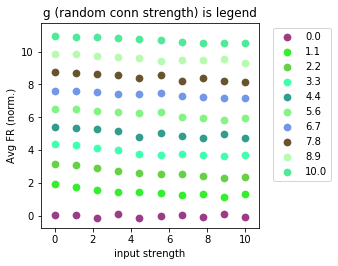

In [5]:
# %% multi simulations

pkl_path_dir = f"{project_dir}/sim-exports"
os.makedirs(pkl_path_dir, exist_ok=True) if not os.path.exists(pkl_path_dir) else None
pkl_path_full =  f"{pkl_path_dir}/lowrank_input vs g strength, positive input.pkl"

size1 = size2 = 10
x_range = np.linspace(0, 10, size1)
y_range = np.linspace(0, 10, size2)
# y_range = [1]
size1=len(x_range)
size2=len(y_range)
result = np.empty([size1, size2])  # collect corr coefficients

# Network
N = 1000  # Number of units
Mm = 1.1  # Mean of m
Mn = 2.  # Mean of n
Sim = 1.  # Std of m
Sin = 1.  # Std of n

# connectivity matrix base
R = 1 * GetBulk(N)  # random matrix
m = GetGaussianVector(Mm, Sim, N)
n = GetGaussianVector(Mn, Sin, N)
M = np.outer(m, n) / N  # structured matrix


# initial values
t0 = GetGaussianVector(0, 0, N)




run = 0 # flag for running simulation loop
if run:
    print('\n ** Simulating... **')
    count = 0
    for i, x in enumerate(x_range):
        for j, y in enumerate(y_range):
            count += 1

            if count % 5 == 0: save = True
            else: save = False

            g = y           # Random strength
            s = 1           # structure strength
            h = s / ((np.dot(m, n)) / N)

            # Input
            mean_i = x
            I = GetGaussianVector(mean_i, 1, N)
            # I = 0

            # Simulation

            T = 40         # Total time of integration, expressed in time constants of single units
            deltat = 0.1
            t = np.linspace( 0, T, int(T/deltat) )

            # Build connectivity matrix
            J = g * R + h * M  # final connectivity matrix of the simulation

            ### Simulate
            # initial values
            # t0 = GetGaussianVector(0, 1, N)
            # r_init = np.array([[1]*N]) # vector of firing rates of Nn neurons, initialized at 0 for all neurons
            # t0 = r_init[0]*2

            t_max = 500  # simulation length
            t_stim = 0  # stimulus length (relative to total simulation length)
            time_steps = int(t_max / 10) # resolution


            t = np.linspace(0, t_max, t_max*time_steps)

            ## Simulate
            F = SimulateActivity(t=t, x0=t0, J=J, I=I)

            # plot_network_simulation(data=F, title=f"h param: {x}") if plot else None
            fravg = pop_firing_rate(F, plot=False)
            result[i, j] = fravg

            print(f"\tmean struct base value: {round(np.mean(M), 4)}, mean rand base value: {round(np.mean(R), 4)}")

            print(f"\tmean base connectivity weight value: {round(np.mean(J), 4)}, min: {round(np.min(J), 4)}, max: {round(np.max(J), 4)}")

            print(f"\tinput strength: {round(mean_i, 4)}, g strength: {round(g, 4)}, and fr_avg: {round(np.mean(fravg),4)}")

            if save:
                to_save = {'avg_fr': result,
                           'variables':
                               {'g': y_range,
                                's_range': 1,
                                'Input val': x_range,
                                'Init val': np.mean(t0),
                                },
                           'title': f"input vs g strength",
                           'experiment': 'input vs g strength, s=1',
                           'pkl_path_full': pkl_path_full
                           }

                with open(to_save['pkl_path_full'], 'wb') as f:
                    print(f"saving to ({count}): {to_save['pkl_path_full']}")
                    pickle.dump(to_save, f)

            print('\n')

results = funcs.load_pkl(pkl_path_full)
x_range = results['variables']['Input val']
result = results['avg_fr']



# plot network response vs. conn. param strength
fig, ax = plt.subplots(figsize=(5,4))
for idx in range(result.shape[1]):
    funcs.make_general_scatter([x_range], [result[idx]], alpha=1, s=60, figsize=(3,3), x_label='input strength', y_label='Avg FR (norm.)',
                               ax_titles=[f"g (random conn strength) is legend"], fig=fig, ax=ax, show=False, legend_labels=[str(round(y_range[idx],1))])
fig.show()